<a href="https://colab.research.google.com/github/YasminaElkhazen/GoldPricePrediction/blob/main/Technical_Interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv('/content/technical_case_data.csv')
df.head()

,CustomerID,PurchaseDate,ProductID,ProductCategory,ProductPrice,Quantity,TotalPrice
0,1,2024-04-06 03:04:22,P016,Accessories,222.099545,4,888.398178
1,2,2024-04-29 22:21:13,P011,Clothing,400.038092,2,800.076183
2,3,2024-04-27 09:00:55,P099,Electronics,959.102132,2,1918.204263
3,4,2024-04-28 22:35:11,P039,Electronics,400.024264,2,800.048529
4,5,2024-04-08 14:14:58,P073,Accessories,654.112213,4,2616.448850


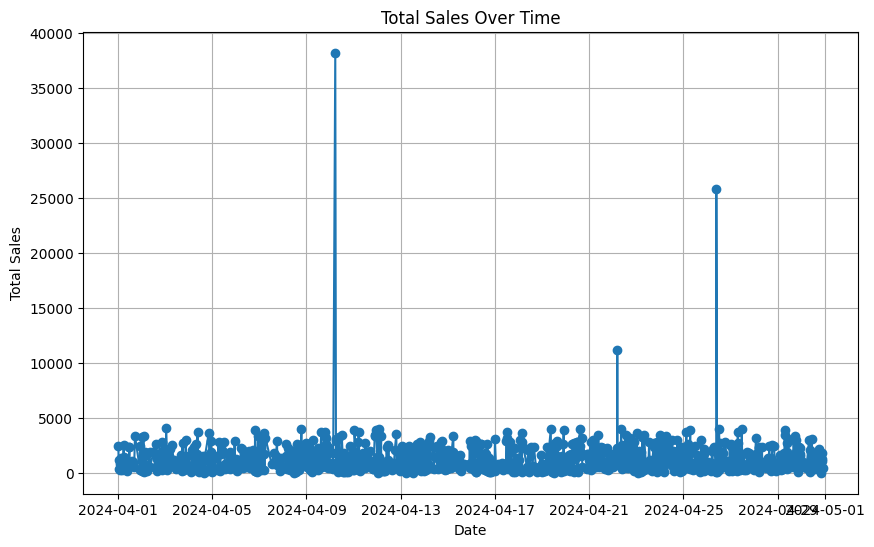

In [3]:
# Convert PurchaseDate to datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Calculate Total Sales
df['TotalSales'] = df['ProductPrice'] * df['Quantity']

# Aggregate sales by date
sales_by_date = df.groupby('PurchaseDate')['TotalSales'].sum().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['PurchaseDate'], sales_by_date['TotalSales'], marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [4]:
print(df.describe)

<bound method NDFrame.describe of      CustomerID        PurchaseDate ProductID ProductCategory  ProductPrice  \
0             1 2024-04-06 03:04:22      P016     Accessories    222.099545   
1             2 2024-04-29 22:21:13      P011        Clothing    400.038092   
2             3 2024-04-27 09:00:55      P099     Electronics    959.102132   
3             4 2024-04-28 22:35:11      P039     Electronics    400.024264   
4             5 2024-04-08 14:14:58      P073     Accessories    654.112213   
..          ...                 ...       ...             ...           ...   
995         996 2024-04-26 05:10:14      P014     Accessories     53.959260   
996         997 2024-04-10 08:22:12      P093     Accessories     36.747983   
997         998 2024-04-10 20:48:17      P067     Accessories    612.670878   
998         999 2024-04-30 08:14:59      P046        Clothing    356.695588   
999        1000 2024-04-10 06:31:05      P002        Clothing    774.204504   

     Quantity   T

In [5]:
df.dropna()
df.shape

(1000, 8)

In [6]:
df.groupby('ProductCategory').sum()

TypeError: datetime64 type does not support sum operations

In [7]:
df=pd.get_dummies(df, columns= ['ProductCategory'], drop_first=True)

(array([961.,  34.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([  12.4963986 ,  965.71989107, 1918.94338354, 2872.16687602,
        3825.39036849, 4778.61386097, 5731.83735344, 6685.06084591,
        7638.28433839, 8591.50783086, 9544.73132333]),
 <BarContainer object of 10 artists>)

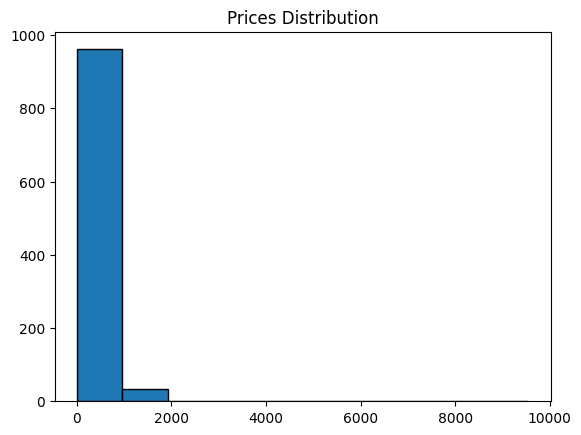

In [8]:
data=df['ProductPrice']
plt.title('Prices Distribution')
plt.hist(data, bins=10, edgecolor='black')


<Axes: ylabel='ProductPrice'>

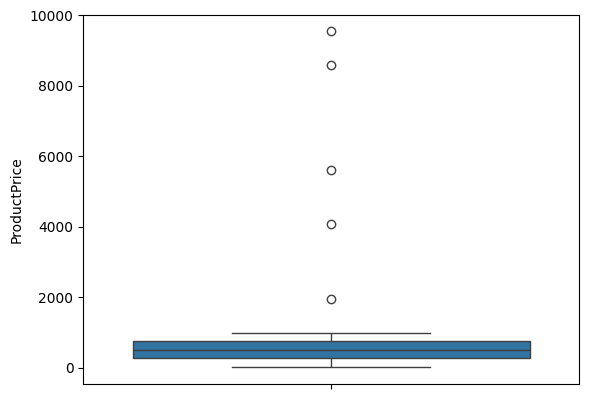

In [9]:
sns.boxplot(data=data)

<Axes: >

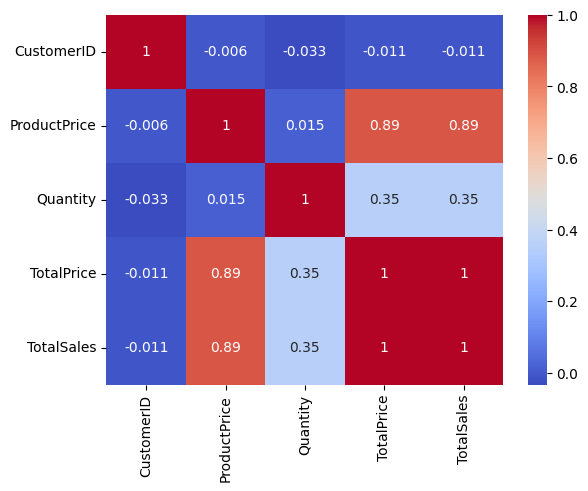

In [18]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])
corr_mat = numeric_df.corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')


In [20]:
df.columns

Index(['CustomerID', 'PurchaseDate', 'ProductID', 'ProductPrice', 'Quantity',
       'TotalPrice', 'TotalSales', 'ProductCategory_Clothing',
       'ProductCategory_Electronics'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
df.head()

,CustomerID,PurchaseDate,ProductID,ProductPrice,Quantity,TotalPrice,TotalSales,ProductCategory_Clothing,ProductCategory_Electronics
0,1,2024-04-06 03:04:22,P016,222.099545,4,888.398178,888.398178,False,False
1,2,2024-04-29 22:21:13,P011,400.038092,2,800.076183,800.076183,True,False
2,3,2024-04-27 09:00:55,P099,959.102132,2,1918.204263,1918.204263,False,True
3,4,2024-04-28 22:35:11,P039,400.024264,2,800.048529,800.048529,False,True
4,5,2024-04-08 14:14:58,P073,654.112213,4,2616.448850,2616.448850,False,False


In [13]:
X= df[['ProductPrice', 'Quantity' ]]
Y = df['TotalPrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [16]:
mse= mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [17]:
print(mse)
print(r2)

1153818.7994841842
0.8440575505192561
